In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
selected_features = ['Destination Port', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets',
                     'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
                     'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 
                     'Bwd Packet Length Std', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
                     'Flow IAT Min', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Std',
                     'Bwd IAT Max', 'Bwd IAT Min', 'Min Packet Length', 'Max Packet Length', 
                     'Packet Length Mean', 'Packet Length Std', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 
                     'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count']

added_features = ['Fwd PSH Flags', 'Fwd URG Flags', 'Bwd PSH Flags', 'Bwd URG Flags']

#extra_features = ['Active Max', 'Idle Max' ]

computed_features = ['Flow Duration', 'Flow Bytes/s', 'Flow Packets/s', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Variance']

selected_features_total = (selected_features + 
                           added_features + 
                           computed_features)
    

In [3]:
train_dataset_path = 'C:/Users/katsa/OneDrive/Jupyter_files/shallow_models_online/cic_train_sample_binary.csv'
CICDataset_train = pd.read_csv(train_dataset_path)
X_train, y_train = CICDataset_train[selected_features_total], CICDataset_train['Label']

In [4]:
# Create a pipeline with SimpleImputer, StandardScaler, and DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier())
])

# Define the hyperparameter grid to search over
param_grid = {
    'clf__max_iter': [1000],
    'clf__hidden_layer_sizes': [(20,), (40,), (50,), (60,), (70,), (85,), (100,)]
}

# Create a GridSearchCV object with the pipeline and hyperparameter grid
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object on your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 1000}
Best score: 0.99


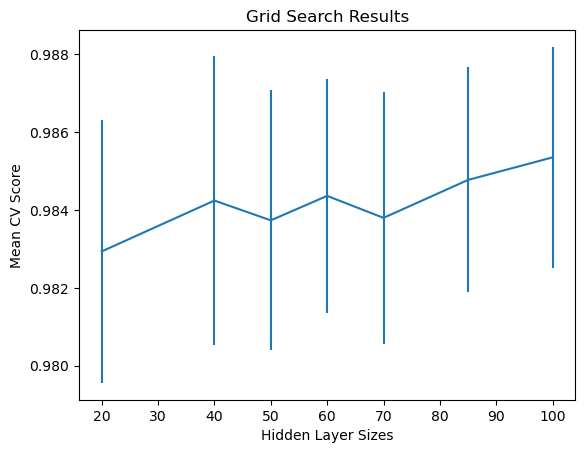

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the mean cross-validation scores and standard deviations
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Extract the hyperparameters
params = grid_search.cv_results_['params']
hidden_layer_sizes = [param['clf__hidden_layer_sizes'][0] for param in params]

# Plot the results
plt.errorbar(hidden_layer_sizes, mean_scores, yerr=std_scores)
plt.title("Grid Search Results")
plt.xlabel("Hidden Layer Sizes")
plt.ylabel("Mean CV Score")
plt.show()